In [41]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.preprocessing import LabelEncoder


Number of duplicate rows: 0
Dropped columns: ['loan_id']
No missing values found.
Descriptive Statistics:
       no_of_dependents  income_annum   loan_amount    loan_term  cibil_score  \
count       4269.000000  4.269000e+03  4.269000e+03  4269.000000  4269.000000   
mean           2.498712  5.059124e+06  1.513345e+07    10.900445   599.936051   
std            1.695910  2.806840e+06  9.043363e+06     5.709187   172.430401   
min            0.000000  2.000000e+05  3.000000e+05     2.000000   300.000000   
25%            1.000000  2.700000e+06  7.700000e+06     6.000000   453.000000   
50%            3.000000  5.100000e+06  1.450000e+07    10.000000   600.000000   
75%            4.000000  7.500000e+06  2.150000e+07    16.000000   748.000000   
max            5.000000  9.900000e+06  3.950000e+07    20.000000   900.000000   

       residential_assets_value  commercial_assets_value  luxury_assets_value  \
count              4.269000e+03             4.269000e+03         4.269000e+03   
me

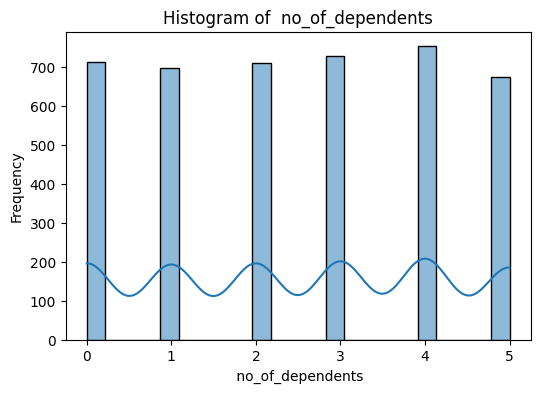

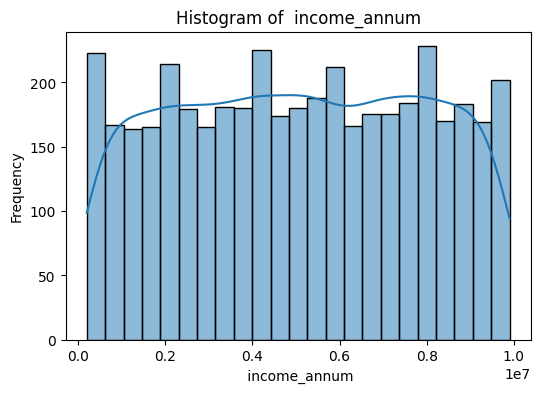

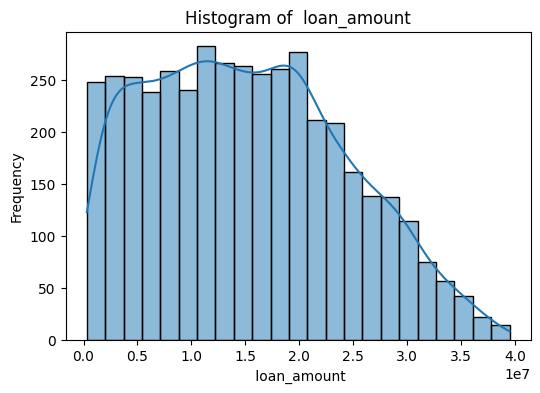

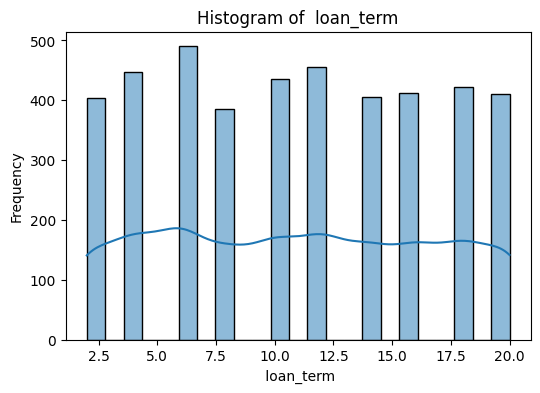

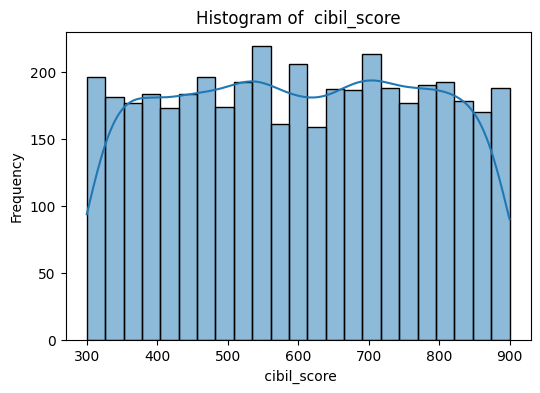

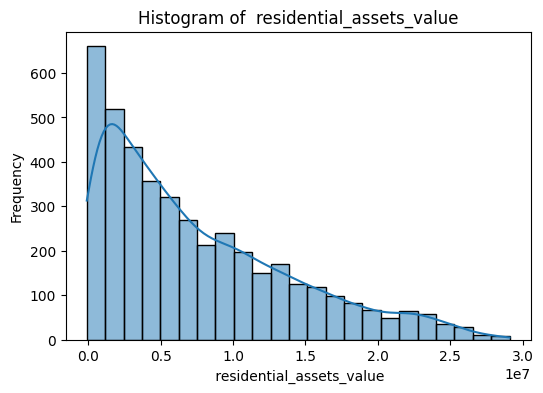

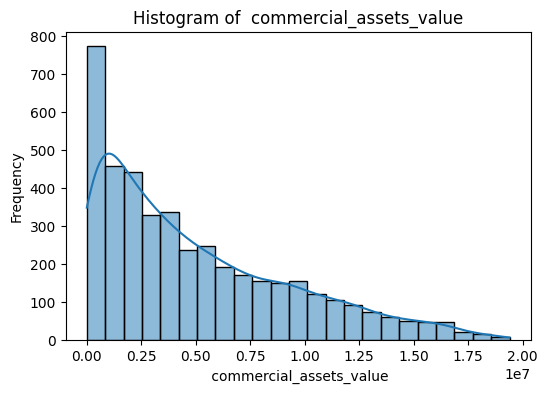

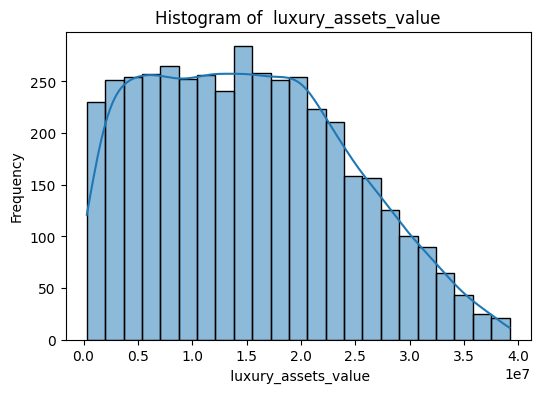

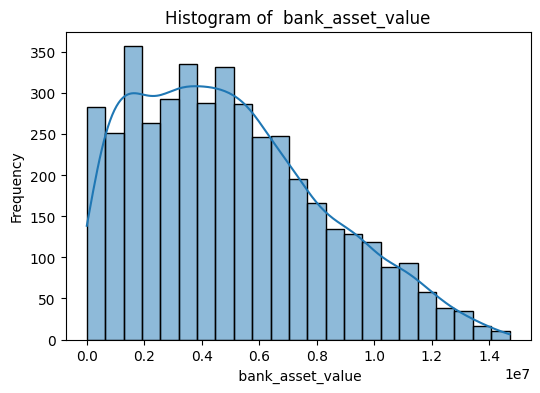


Bar Charts:


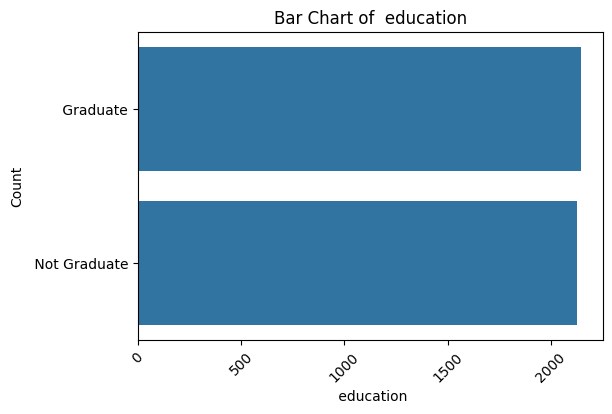

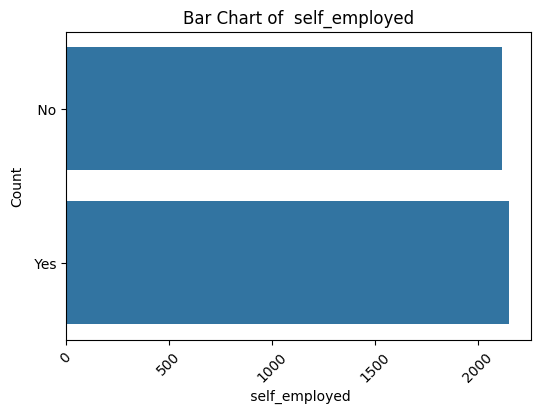

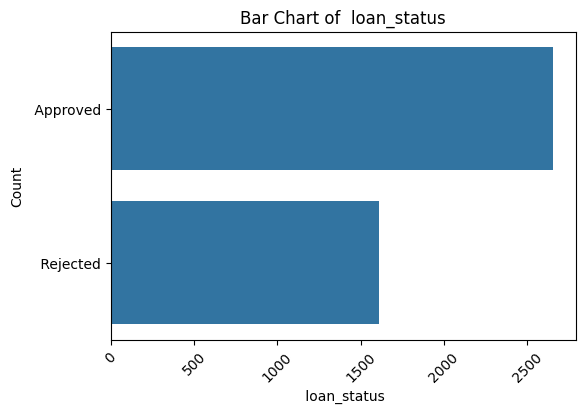


Box Plots:


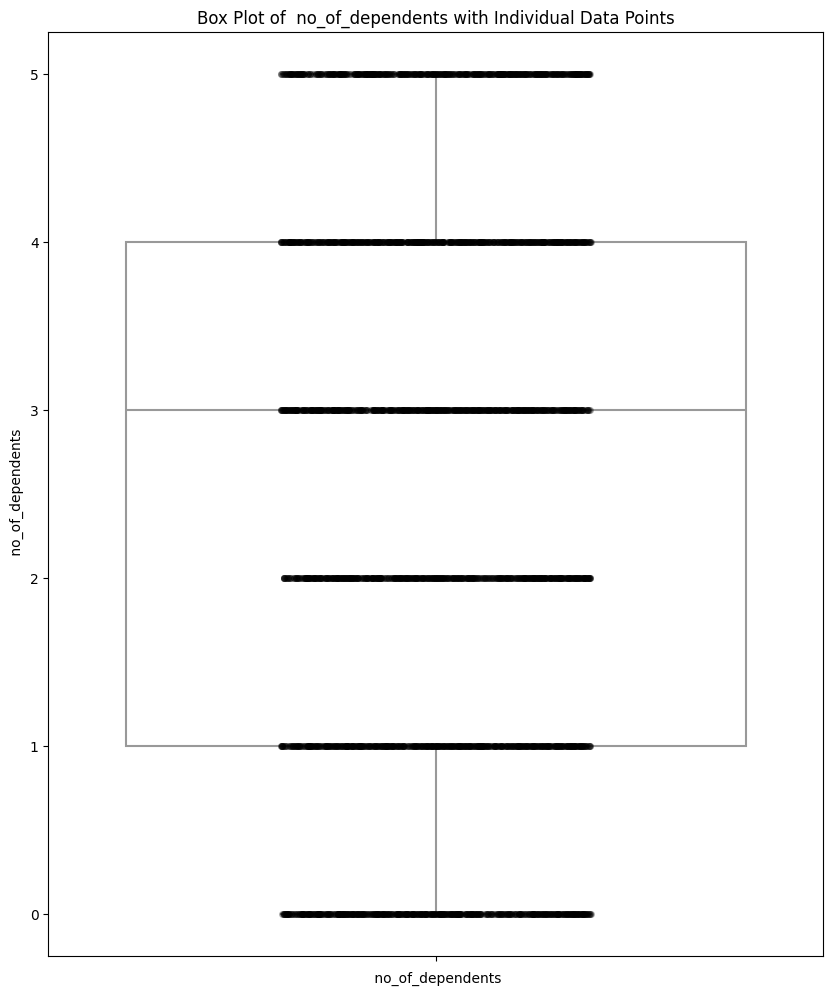

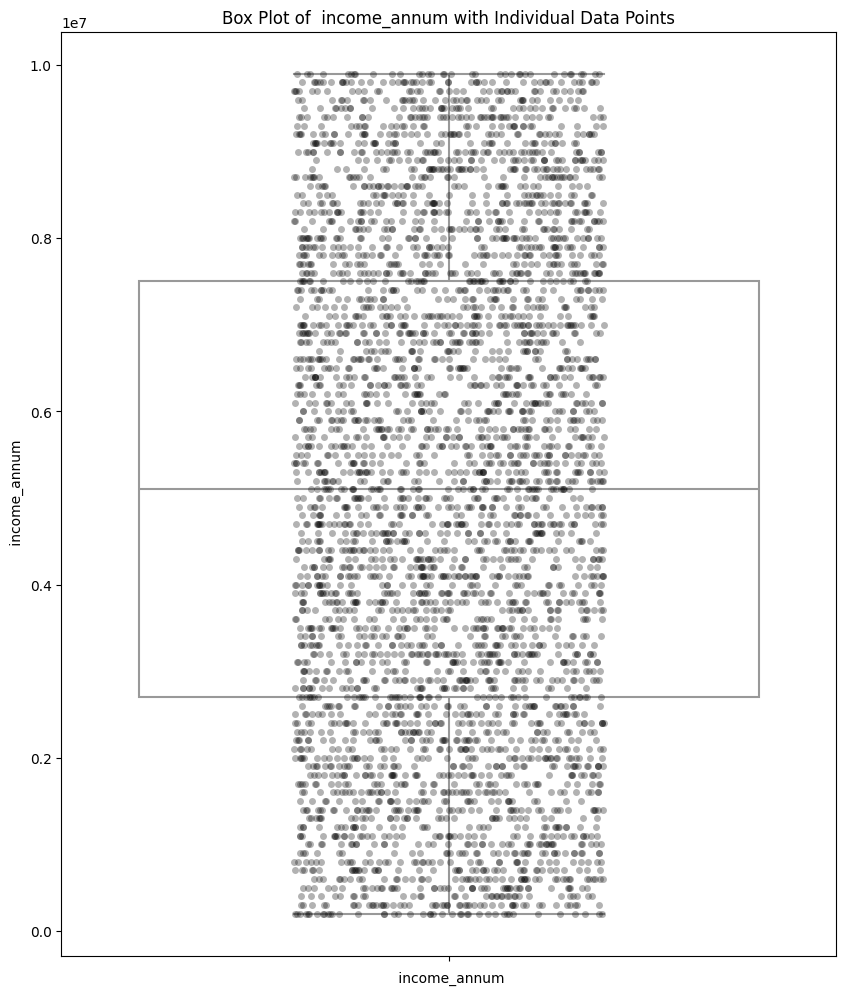

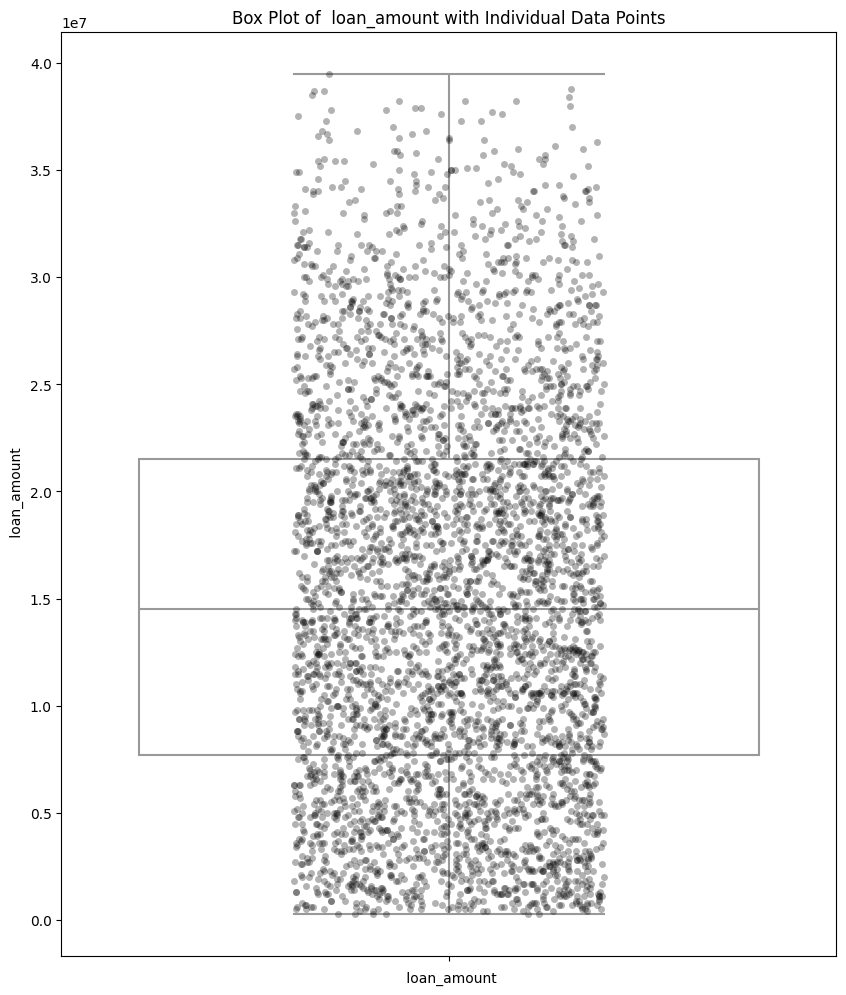

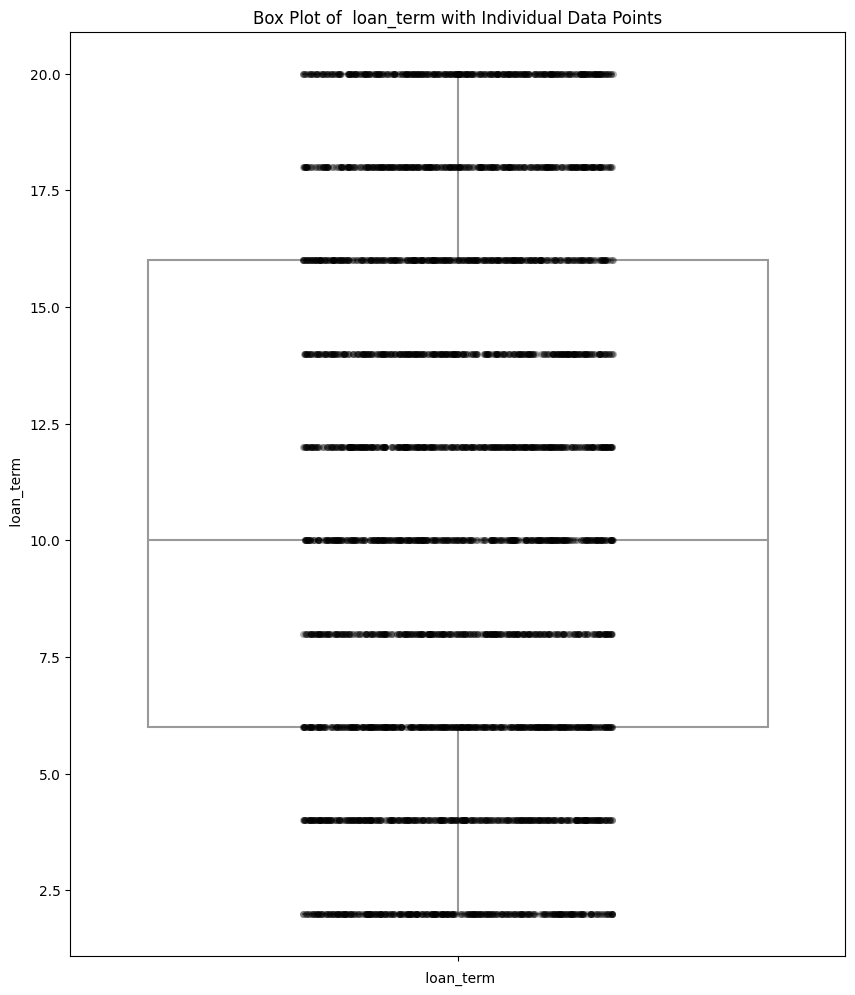

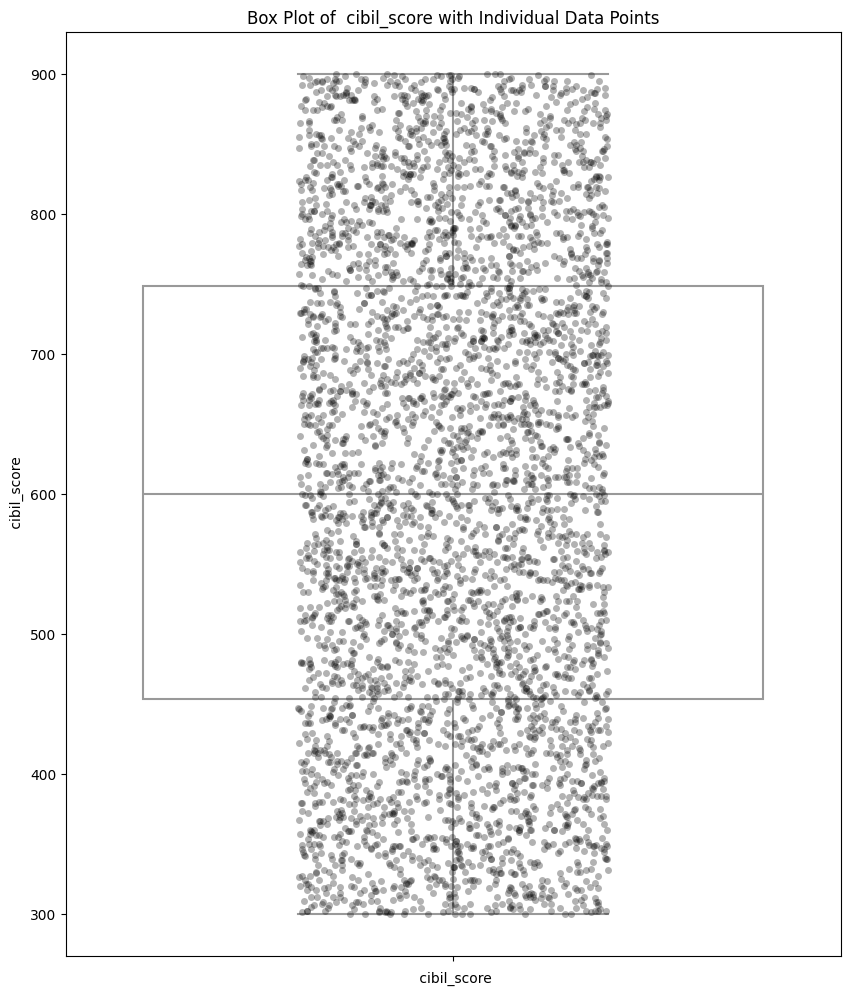

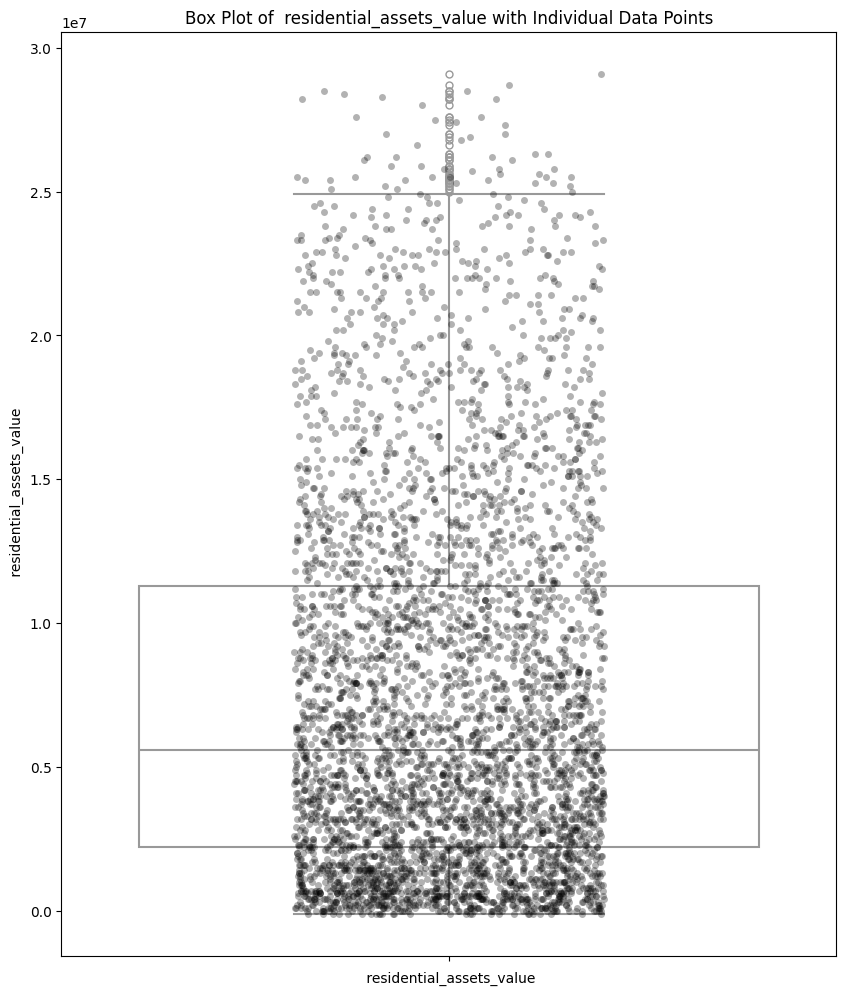

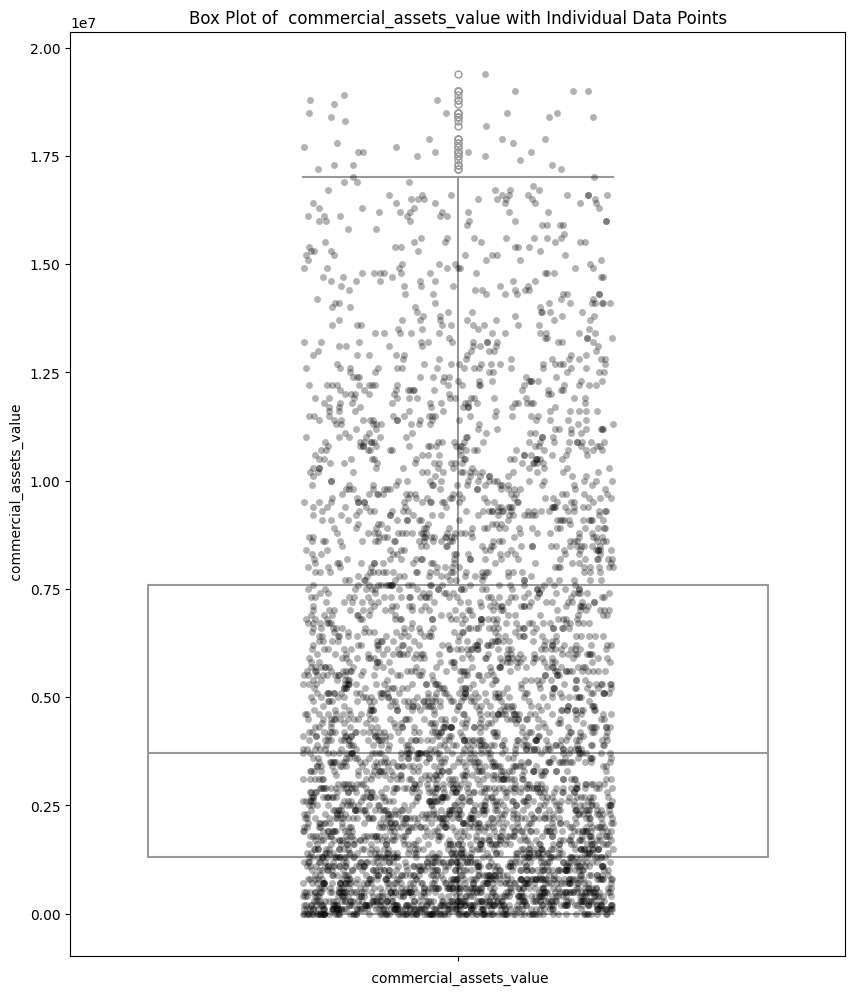

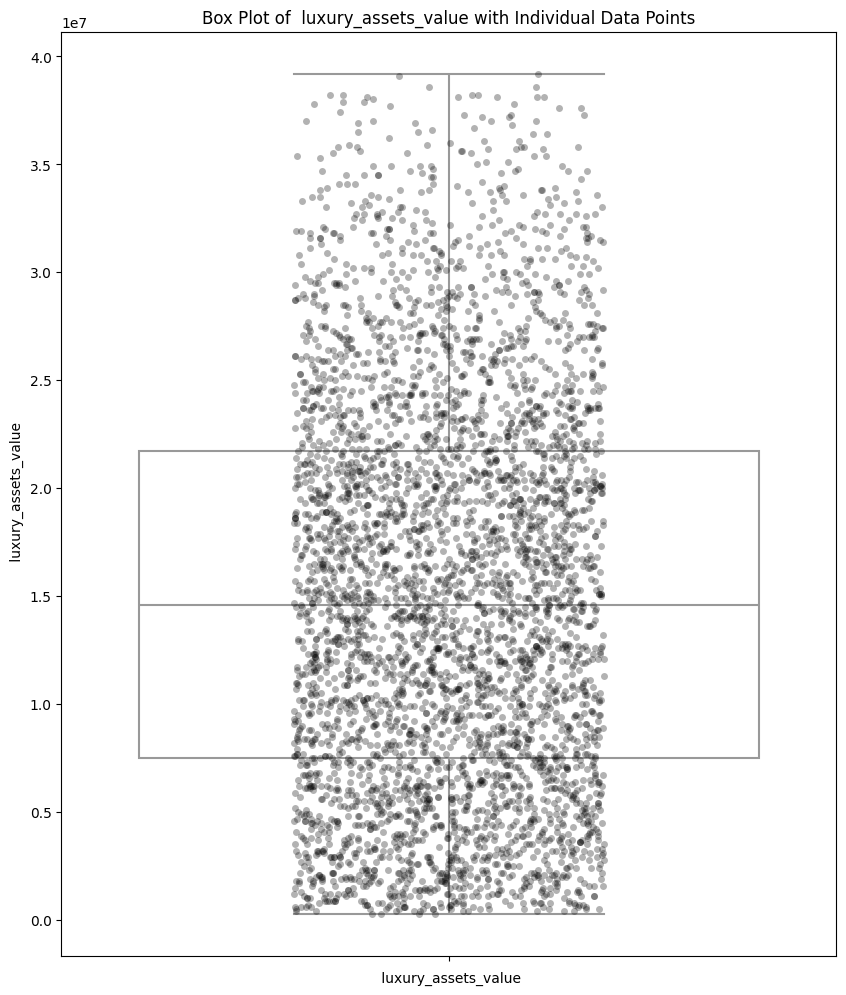

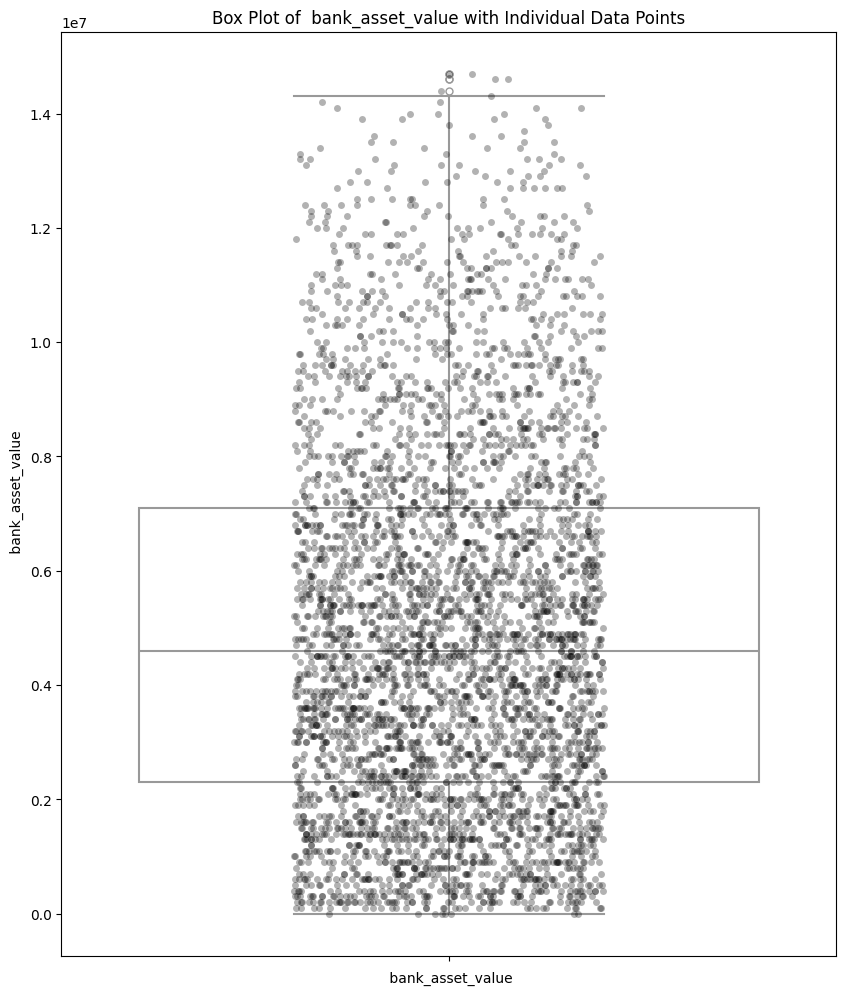

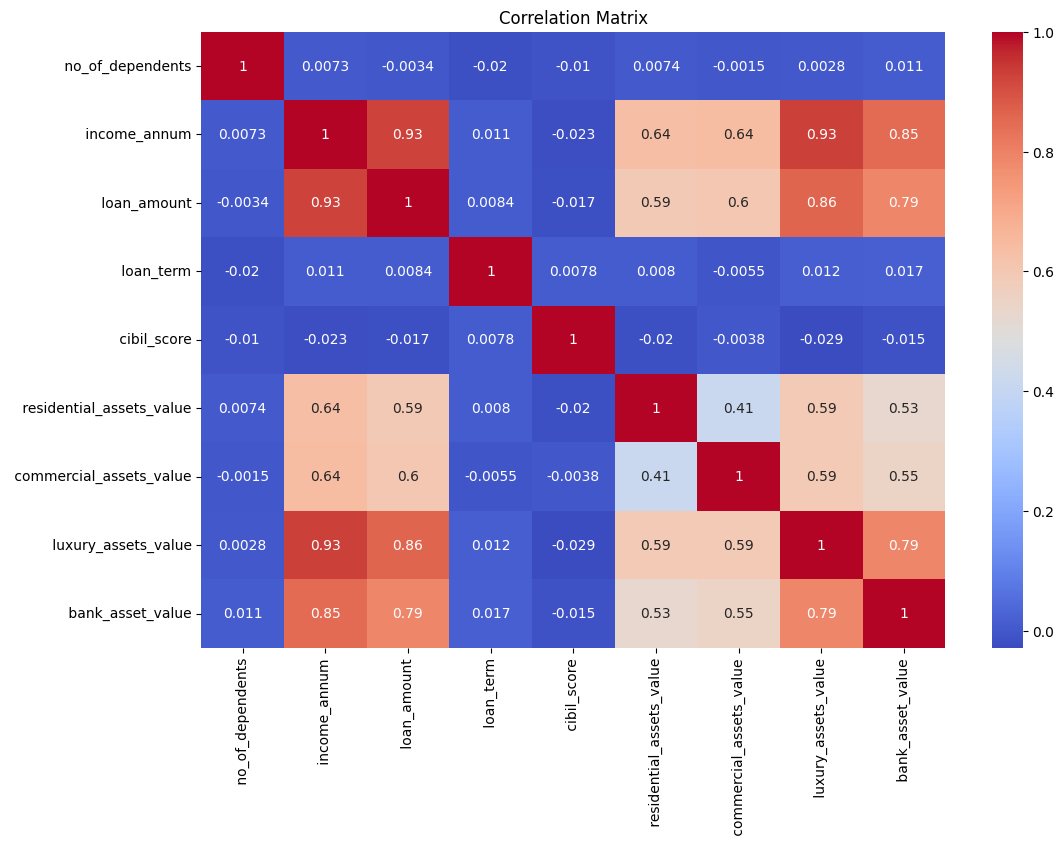

Outliers detected in  residential_assets_value.

outlier handled  0        2400000.0
1        2700000.0
2        7100000.0
3       18200000.0
4       12400000.0
           ...    
4264     2800000.0
4265     4200000.0
4266     1200000.0
4267     8200000.0
4268    17800000.0
Name:  residential_assets_value, Length: 4269, dtype: float64


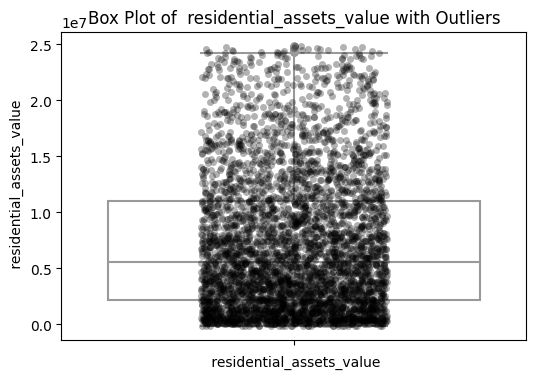

Outliers detected in  commercial_assets_value.

outlier handled  0       4.973155e+06
1       2.200000e+06
2       4.500000e+06
3       3.300000e+06
4       8.200000e+06
            ...     
4264    5.000000e+05
4265    2.900000e+06
4266    1.240000e+07
4267    7.000000e+05
4268    1.180000e+07
Name:  commercial_assets_value, Length: 4269, dtype: float64


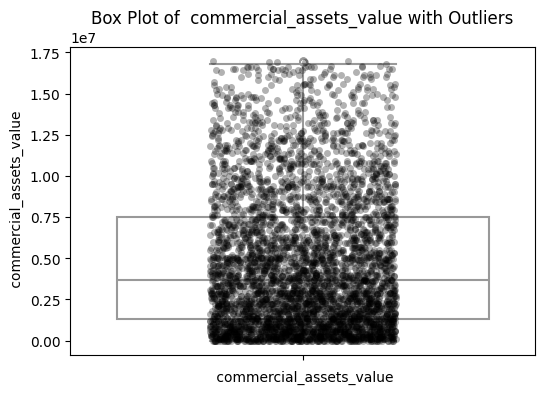

Outliers detected in  bank_asset_value.

outlier handled  0        8000000.0
1        3300000.0
2       12800000.0
3        7900000.0
4        5000000.0
           ...    
4264      800000.0
4265     1900000.0
4266     7300000.0
4267     5800000.0
4268    12000000.0
Name:  bank_asset_value, Length: 4269, dtype: float64


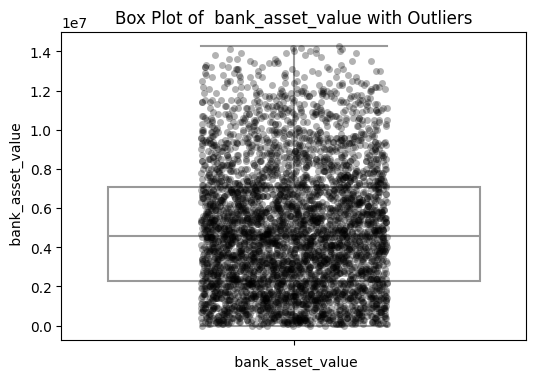

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000.0,4.973155e+06,22700000,8000000.0,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000.0,2.200000e+06,8800000,3300000.0,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000.0,4.500000e+06,33300000,12800000.0,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000.0,3.300000e+06,23300000,7900000.0,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000.0,8.200000e+06,29400000,5000000.0,Rejected
5,0,Graduate,Yes,4800000,13500000,10,319,6800000.0,8.300000e+06,13700000,5100000.0,Rejected
6,5,Graduate,No,8700000,33000000,4,678,22500000.0,1.480000e+07,29200000,4300000.0,Approved
7,2,Graduate,Yes,5700000,15000000,20,382,13200000.0,5.700000e+06,11800000,6000000.0,Rejected
8,0,Graduate,Yes,800000,2200000,20,782,1300000.0,8.000000e+05,2800000,600000.0,Approved
9,5,Not Graduate,No,1100000,4300000,10,388,3200000.0,1.400000e+06,3300000,1600000.0,Rejected


In [42]:
#load dataset method
def loadData(file_path):
    df = pd.read_csv(file_path)
    return df
# data cleaning method
def cleaningData(df, drop_columns=None):
    # Check for duplicate records
    duplicate = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicate}")

    if duplicate > 0:
        df = df.drop_duplicates()
        print("Duplicate rows have been dropped.")
    
    if drop_columns:
        df = df.drop(columns=drop_columns)
        print(f"Dropped columns: {drop_columns}")

    return df
# missing values handled in this method
def handleMissingValues(df, strategy='mean', columns=None):
    if df.isnull().values.any():
        if strategy == 'mean':
            numeric_cols = df.select_dtypes(include='number').columns
            df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
        elif strategy == 'median':
            numeric_cols = df.select_dtypes(include='number').columns
            df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
        elif strategy == 'mode':
            for column in df.columns:
                df[column] = df[column].fillna(df[column].mode()[0])
        print("Handled missing values using strategy: ", strategy)
    else:
        print("No missing values found.")

    return df
#data viualization
def EDA(data):
    # Statistics description like (mean, mode, median)
    print("Descriptive Statistics:")
    print(data.describe())
    
    # Histograms for numeric data
    print("\nHistograms:")
    for column in data.select_dtypes(include='number'):
        plt.figure(figsize=(6, 4))
        sns.histplot(data[column], bins=23, kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
    
    # Bar charts for categorical data and object type data
    print("\nBar Charts:")
    for column in data.columns:
        if isinstance(data[column].dtype, pd.CategoricalDtype):  # if categorical
            plt.figure(figsize=(6, 4))
            sns.countplot(data[column])
            plt.title(f'Bar Chart of {column}')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()
        elif data[column].dtype == 'object':  # object dtype for categorical variables
            plt.figure(figsize=(6, 4))
            sns.countplot(data[column])
            plt.title(f'Bar Chart of {column}')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()
    
    # Identify Outlier using Box Plot
    print("\nBox Plots:")
    for column in data.select_dtypes(include='number'):
        plt.figure(figsize=(10, 12))
        sns.boxplot(data[column], color='white', fliersize=5, linewidth=1.5)
        sns.stripplot(data[column], color='black', jitter=0.2, alpha=0.3)
        plt.title(f'Box Plot of {column} with Individual Data Points')
        plt.xlabel(column)
        plt.show()
    
    # Correlation matrix
    if data.select_dtypes(include='number').shape[1] > 1:
        corr_matrix = data.select_dtypes(include='number').corr()
        plt.figure(figsize=(12, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
        plt.title('Correlation Matrix')
        plt.show()
    else:
        print("Cannot generate correlation matrix: Insufficient numeric columns.")

    return data
# outlier detect using iqr  method
def detectOutliers(df):
    outlier_columns = []
    
    for column in df.select_dtypes(include='number'):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        if not outliers.empty:
            outlier_columns.append(column)
            print(f"Outliers detected in {column}.")
            df[column] = df[column].apply(lambda x: df[column].mean() if x < lower_bound or x > upper_bound else x)
            print("\noutlier handled ",df[column])
            # Plot box plot for the column with outliers
            plt.figure(figsize=(6, 4))
            sns.boxplot(df[column], color='white', fliersize=5, linewidth=1.5)
            sns.stripplot(df[column], color='black', jitter=0.2, alpha=0.3)
            plt.title(f'Box Plot of {column} with Outliers')
            plt.xlabel(column)
            plt.show()
    
    if not outlier_columns:
        print("No outliers detected in any numeric columns.")
    
    return df

# File path for the dataset
filePath = r'C:\Users\DS\Downloads\loan_approval_dataset.csv'

# Load, clean, handle missing values, and perform EDA
df = loadData(filePath)
drop_columns_df = ['loan_id']
df = cleaningData(df, drop_columns=drop_columns_df)
df = handleMissingValues(df)

EDA(df)
df=detectOutliers(df)
df.head(10)


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Remove whitespace spaces from column names
df.columns = df.columns.str.strip()

# Remove white space   from column values
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].map(lambda x: x.strip() if isinstance(x, str) else x)



# Encode  categorical columns
categorical_columns = ['self_employed', 'loan_status','education']  # Add other categorical columns as needed
for column in categorical_columns:
    df[column] = LabelEncoder().fit_transform(df[column])
    
#Manual spliting 
# Shuffle the dataframe
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Calculate the number of samples for training (80%) and testing (20%)
train_size = int(0.8 * len(df_shuffled))

# Split the data
train_set = df_shuffled[:train_size]
test_set = df_shuffled[train_size:]

# Separate features and target for both training and testing sets
X_train = train_set.drop('loan_status', axis=1)
y_train = train_set['loan_status']

X_test = test_set.drop('loan_status', axis=1)
y_test = test_set['loan_status']

#length of train set and test set
print("Training Set Size:", len(train_set))
print("Testing Set Size:", len(test_set))

# Fit the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set and evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.2f}")


Training Set Size: 3415
Testing Set Size: 854
Accuracy on test set: 0.58


In [44]:
# cross validation(knn)
from sklearn.model_selection import cross_val_score
# Separate features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Perform 5-fold cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores and their mean
print("Cross-validation scores:", cv_scores)
print(f"Mean cross-validation score: {cv_scores.mean():.2f}")


Cross-validation scores: [0.54566745 0.55386417 0.56206089 0.55386417 0.57444314]
Mean cross-validation score: 0.56


Manual Train-Test Split Metrics:
Accuracy: 0.58
Precision: 0.41
Recall: 0.30
F1-score: 0.35
ROC-AUC: 0.54

Cross-Validation Metrics:
Accuracy: 0.56
Precision: 0.38
Recall: 0.28
F1-score: 0.32
ROC-AUC: 0.51


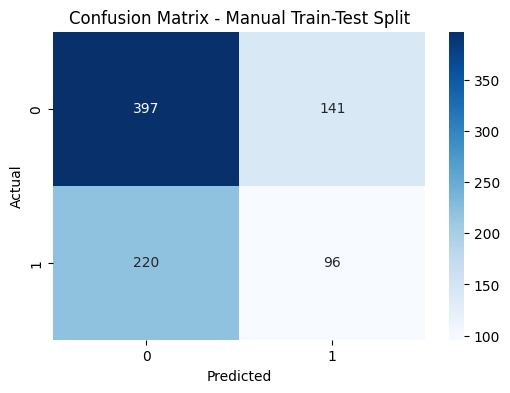

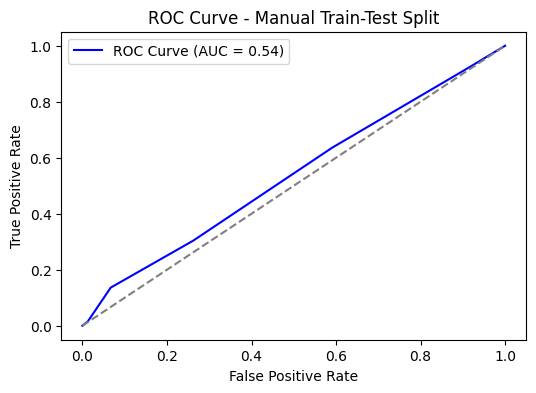

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve


knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Manual Train-Test Split Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Perform cross-validation
y_pred_cv = cross_val_predict(knn, X, y, cv=5, method='predict')
y_pred_proba_cv = cross_val_predict(knn, X, y, cv=5, method='predict_proba')[:, 1]

# Calculate cross-validation metrics
accuracy_cv = accuracy_score(y, y_pred_cv)
precision_cv = precision_score(y, y_pred_cv)
recall_cv = recall_score(y, y_pred_cv)
f1_cv = f1_score(y, y_pred_cv)
roc_auc_cv = roc_auc_score(y, y_pred_proba_cv)

print("\nCross-Validation Metrics:")
print(f"Accuracy: {accuracy_cv:.2f}")
print(f"Precision: {precision_cv:.2f}")
print(f"Recall: {recall_cv:.2f}")
print(f"F1-score: {f1_cv:.2f}")
print(f"ROC-AUC: {roc_auc_cv:.2f}")

# Plot confusion matrix for manual train-test split
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Manual Train-Test Split')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC curve for manual train-test split
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Manual Train-Test Split')
plt.legend()
plt.show()
